In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from pipetorch.train import *

using gpu 2


In [7]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [2]:
#Checking wich GPU is beeing used

!nvidia-smi

Fri Oct 29 10:48:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:05:00.0 Off |                  N/A |
| 29%   27C    P8    17W / 250W |   2217MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:09:00.0 Off |                  N/A |
| 29%   

In [3]:
# set data directory
data_dir = 'dialogue/Bjärn/images/splitfolders/'

#preparing the transform method to transform data into a Tensor object
transform = transforms.Compose([
    #transforms.RandomRotation(20),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor()]) 
    
train_set = datasets.ImageFolder(data_dir + 'train', transform=transform) #contents from the 'train' folder is put in train_set
test_set = datasets.ImageFolder(data_dir + 'test', transform=transform)
print(len(train_set))
print(len(test_set))
print(len(test_set)/len(test_set+train_set))
train_dataloader = DataLoader(train_set, batch_size=32, shuffle=True)#train_set is made into a dataloader, shuffled
test_dataloader = DataLoader(test_set, batch_size=32, shuffle=True)

1588
201
0.11235326998323085


In [4]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.flatten = nn.Flatten() #the images are flattened (pixels are placed end to end)
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(373248, 512), # in the first layer, 373248 is the amount of input features, 512 is the output amount
#             nn.ReLU(),
#             nn.Linear(512, 512), #second layer, input and output features is 512 (maybe this could be larger?)
#             nn.ReLU(),
#             nn.Linear(512, 10) #output layer, input features is 512, output features is 10 (these 10 is what the NN uses to 'learn')
#         )

#     def forward(self, x): #this function runs the above code with our data 'x' passed to it
#         x = self.flatten(x)
#         logits = self.linear_relu_stack(x)
#         return logits

#     def post_forward(self, y): 
#         return torch.argmax(y, axis=1) #returns the highest value from a tensor object (jeroen wrote this function)
    
# model = NeuralNetwork().to(device) #model is passed to gpu
# print(model)

Using cuda device


In [16]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        #x = self.linear_layers(x)
        return x

# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [6]:
loss_fn = nn.CrossEntropyLoss() #loss function is defined (we should try different ones, jeroen mentioned MSELoss and BCELoss)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #the optimizer is defined

In [11]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    for batch, (X, y) in enumerate(train_dataloader):
        x_train, y_train = X.to(device), y.to(device)
    for X, y in test_dataloader:
            X_test, y_test = X.to(device), y.to(device)
    # getting the validation set
    #x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        X_test = X_test.cuda()
        y_test = y_test.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train)
    output_test = model(X_test)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_test, y_test)
    train_losses.append(loss_train)
    #val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

In [8]:
def test(dataloader, model, loss_fn): #function for testing
    size = len(test_dataloader)
    num_batches = len(test_dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [17]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(11.4015, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(10.5588, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(10.3268, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(9.9218, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(8.4266, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(5.3471, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(4.9627, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(4.6847, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  17 	 loss : tensor(4.6622, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  19 	 loss : tensor(4.3423, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  21 	 loss : tensor(4.4890, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  23 	 loss : tensor(4.7168, device='cuda:0', grad_fn=<NllLossBackward>)
Epoch :  25 	 loss : tensor(3.7872, device

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

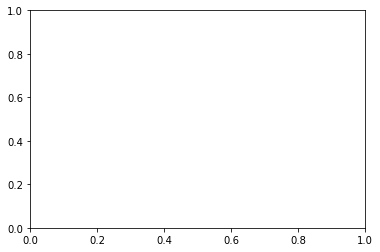

In [18]:

# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

In [19]:
# prediction for training set
with torch.no_grad():
    output = model(train_x.cuda())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

NameError: name 'train_x' is not defined

In [20]:
t.validation_curve()

NameError: name 't' is not defined

In [ ]:
t.evaluator

    accuracy_score  epoch      loss  phase
0         0.425063    1.0  1.491239  train
1         0.686567    1.0  0.926665  valid
2         0.649244    2.0  0.902697  train
3         0.761194    2.0  0.623837  valid
4         0.755668    3.0  0.687878  train
5         0.900498    3.0  0.461148  valid
6         0.885390    4.0  0.405517  train
7         0.925373    4.0  0.307273  valid
8         0.922544    5.0  0.309272  train
9         0.925373    5.0  0.261097  valid
10        0.909320    6.0  0.313361  train
11        0.950249    6.0  0.208358  valid
12        0.942695    7.0  0.222698  train
13        0.970149    7.0  0.175597  valid
14        0.962846    8.0  0.159804  train
15        0.970149    8.0  0.128235  valid
16        0.971662    9.0  0.124121  train
17        0.970149    9.0  0.107585  valid
18        0.978589   10.0  0.105747  train
19        0.975124   10.0  0.109567  valid

In [ ]:
splitfolders.ratio("content/data", output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None) 